In [1]:
import pandas
import numpy
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [2]:
data_all_years = pandas.read_csv('data_all.csv',sep=',')
data_all_years.head()
data_all_years = data_all_years.drop(data_all_years.index[569])
data_all_years = data_all_years.drop(data_all_years.index[569])
data_all_years[565:575]

,last_name,first_name,year,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,...,popups,n_bolts,hp_to_1b,sprint_speed,OPS_Plus_Name,OPS_Plus,UBR_Name,UBR,wRC_Plus_Name,wRC_Plus
565,Votto,Joey,2018.0,0.288,0.484,0.398,0.422,0.196,88.1,13.4,...,4.0,0.0,4.72,25.4,Joey Votto*\vottojo01,126.0,Votto,-3.0,Votto,130.0
566,Wendle,Joey,2018.0,0.264,0.378,0.312,0.326,0.115,88.8,10.7,...,28.0,0.0,4.16,28.3,Joey Wendle*\wendljo01,118.0,Wendle,1.3,Wendle,117.0
567,Yelich,Christian,2018.0,0.323,0.575,0.422,0.402,0.252,92.6,5.0,...,13.0,47.0,4.18,28.7,Christian Yelich*\yelicch01,164.0,Yelich,4.2,Yelich,166.0
568,Zobrist,Ben,2018.0,0.277,0.400,0.340,0.357,0.122,89.9,9.0,...,14.0,0.0,4.36,26.7,Ben Zobrist#\zobribe01,117.0,Zobrist,1.9,Zobrist,123.0
571,Abreu,Jose,2019.0,0.282,0.522,0.363,0.335,0.240,92.1,10.9,...,29.0,0.0,4.47,26.6,Abreu\abreujo02,118.0,Abreu,-3.0,Abreu,117.0
572,Acuna Jr.,Ronald,2019.0,0.282,0.578,0.393,0.368,0.296,90.6,14.2,...,21.0,47.0,4.18,29.4,Acuna Jr.\acunaro01,121.0,Acuna Jr.,4.6,Acuna Jr.,126.0
573,Adames,Willy,2019.0,0.254,0.446,0.326,0.317,0.192,88.5,10.8,...,16.0,0.0,4.27,28.3,Adames\adamewi01,96.0,Adames,1.8,Adames,97.0
574,Ahmed,Nick,2019.0,0.261,0.432,0.326,0.327,0.171,87.8,7.6,...,20.0,2.0,4.35,28.2,Ahmed\ahmedni01,92.0,Ahmed,2.4,Ahmed,91.0
575,Alberto,Hanser,2019.0,0.283,0.401,0.308,0.309,0.119,84.4,11.8,...,26.0,0.0,4.33,26.8,Alberto\alberha01,98.0,Alberto,-0.2,Alberto,96.0
576,Albies,Ozzie,2019.0,0.292,0.497,0.356,0.350,0.205,88.9,15.6,...,28.0,20.0,4.02,28.6,Albies#\albieoz01,113.0,Albies,1.6,Albies,117.0


In [3]:
predictors = ['exit_velocity_avg', 'launch_angle_avg', 'sweet_spot_percent', 'barrels', 'barrel_batted_rate','solidcontact_percent', 'flareburner_percent', 'poorlyunder_percent', 'poorlytopped_percent', 'poorlyweak_percent', 'hard_hit_percent', 'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent', 'oz_swing_miss_percent', 'oz_contact_percent', 'out_zone_swing_miss', 'out_zone_swing', 'out_zone_percent', 'out_zone', 'meatball_swing_percent', 'meatball_percent','pitch_count_offspeed', 'pitch_count_fastball', 'pitch_count_breaking', 'pitch_count','iz_contact_percent', 'in_zone_swing_miss', 'in_zone_swing', 'in_zone_percent', 'in_zone', 'edge_percent', 'edge', 'whiff_percent', 'swing_percent', 'pull_percent', 'straightaway_percent', 'opposite_percent', 'batted_ball', 'f_strike_percent', 'groundballs_percent', 'groundballs','flyballs_percent', 'flyballs', 'linedrives_percent', 'linedrives', 'popups_percent', 'popups', 'n_bolts', 'sprint_speed', 'UBR']
len(predictors)

51

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


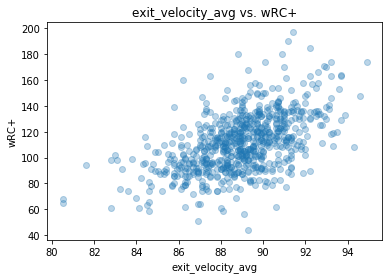

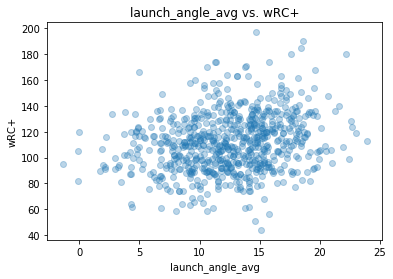

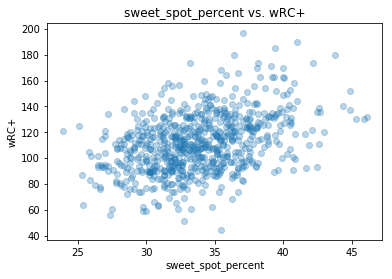

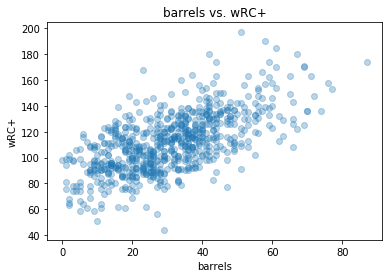

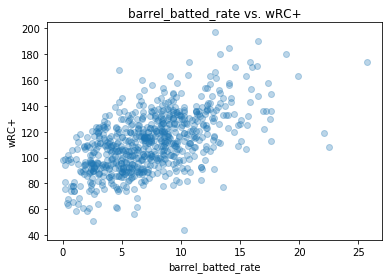

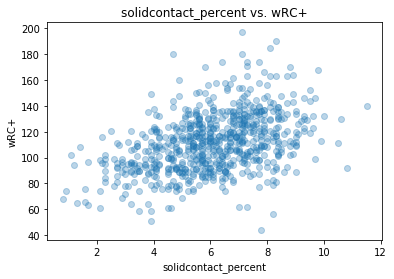

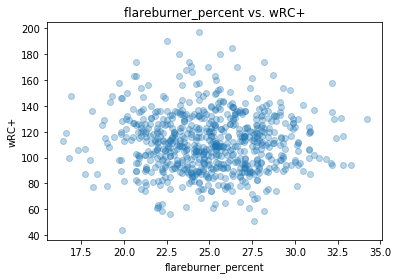

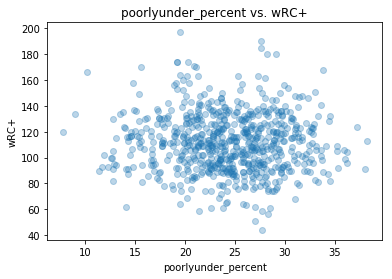

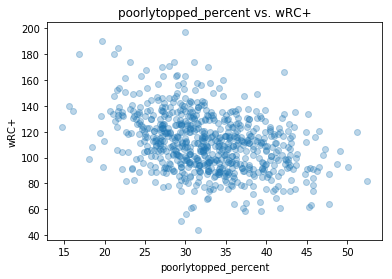

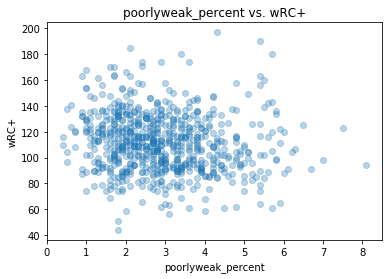

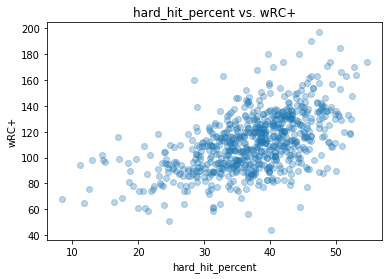

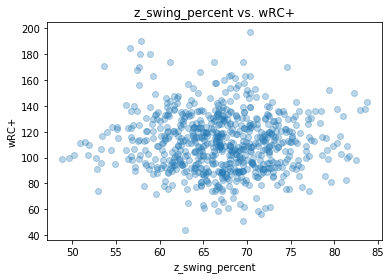

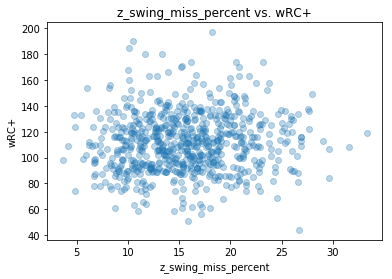

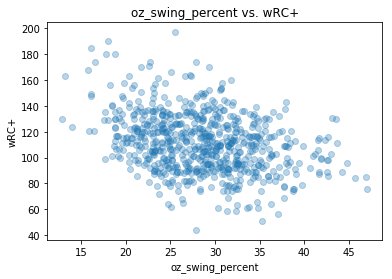

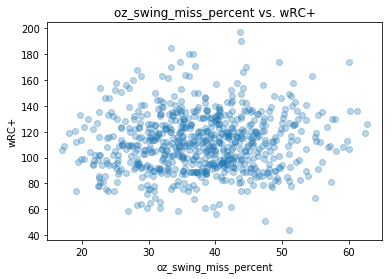

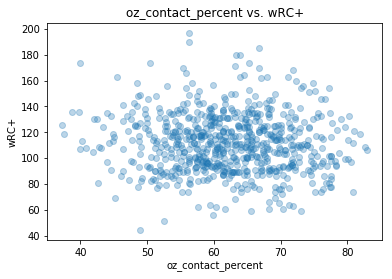

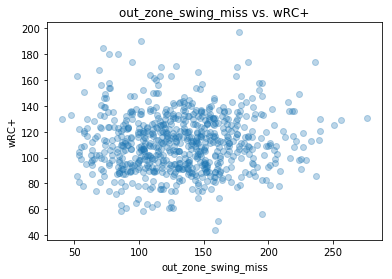

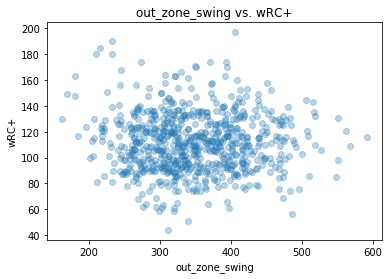

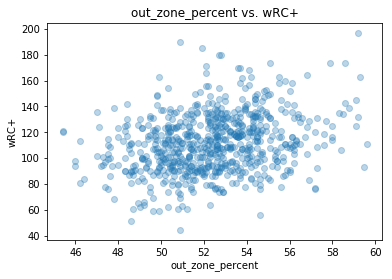

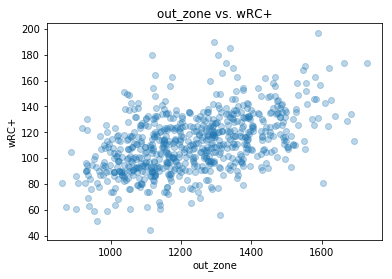

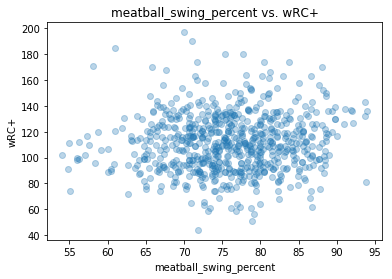

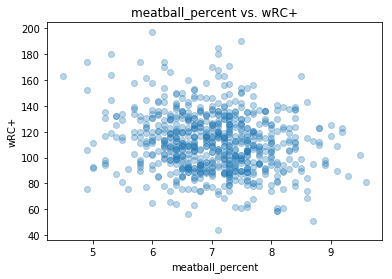

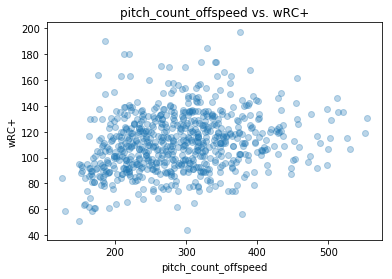

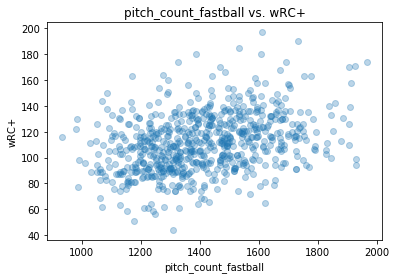

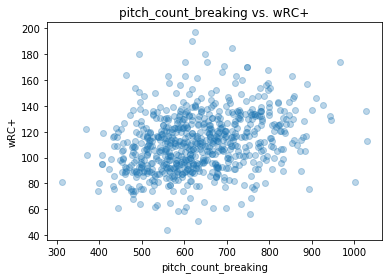

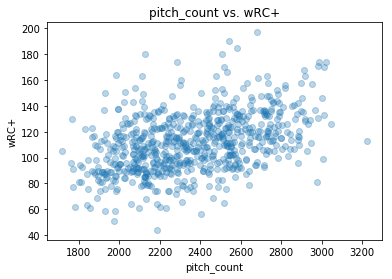

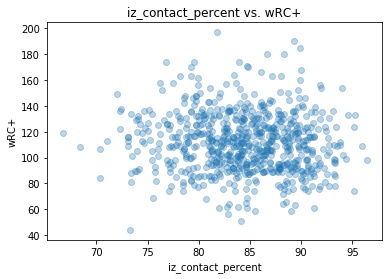

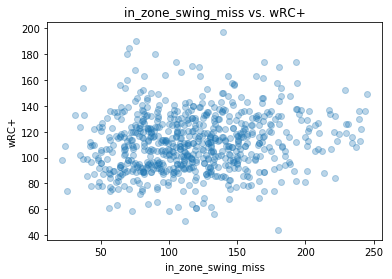

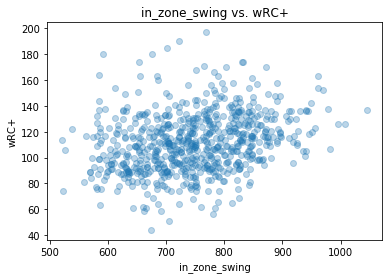

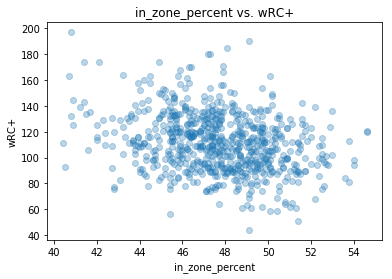

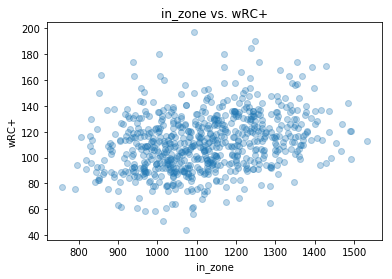

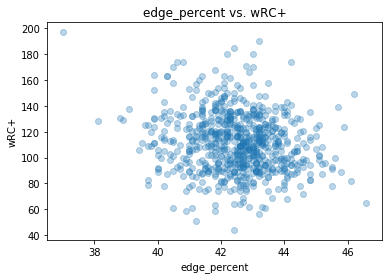

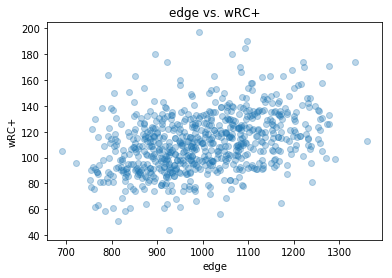

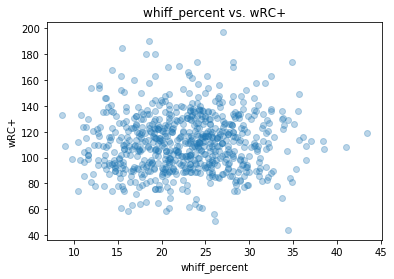

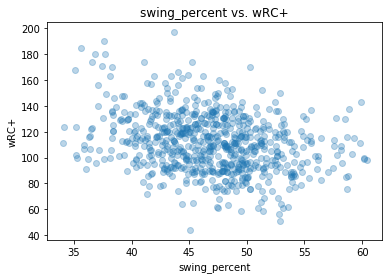

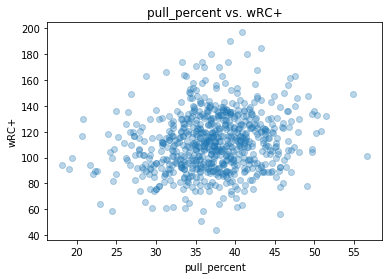

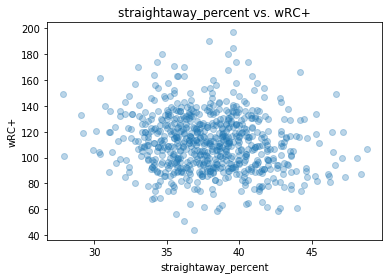

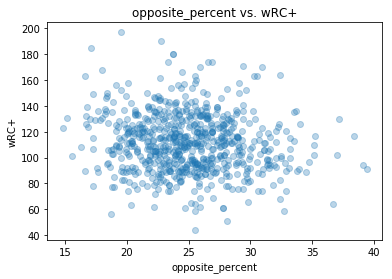

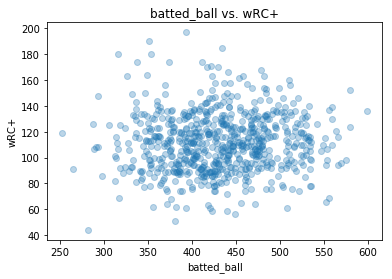

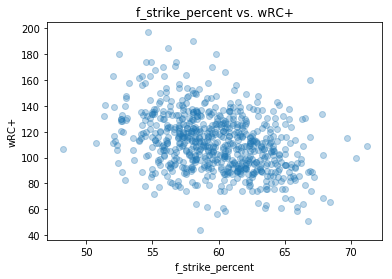

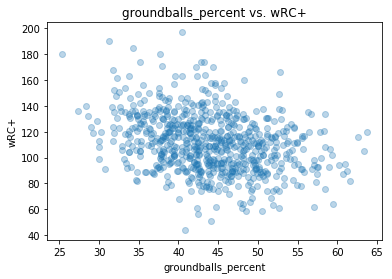

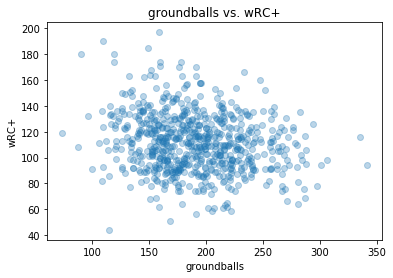

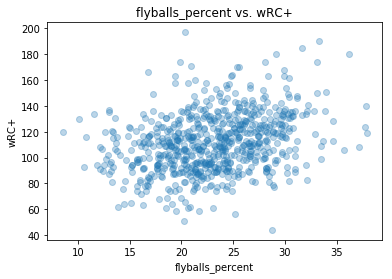

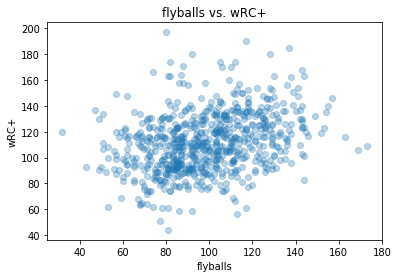

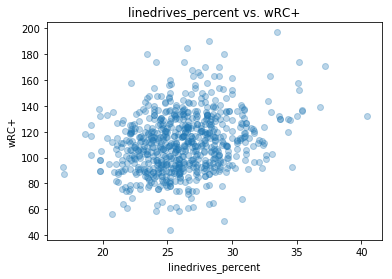

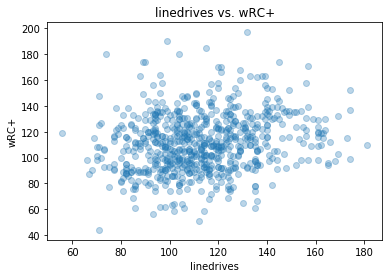

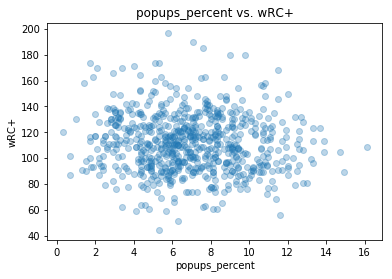

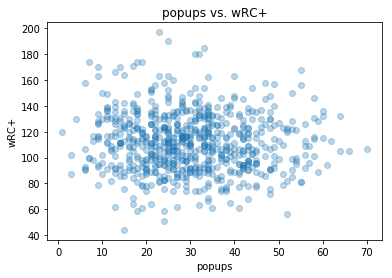

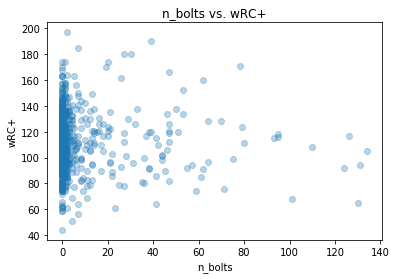

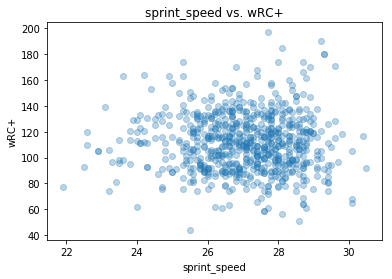

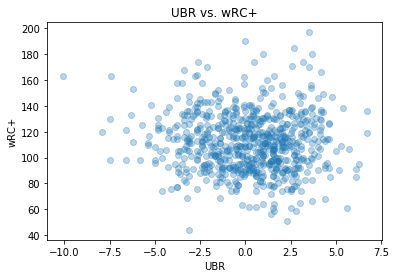

In [4]:
i = 0
for x in predictors:
    plt.figure(i)
    plt.scatter(data_all_years[x], data_all_years['wRC_Plus'],alpha=0.3)
    plt.xlabel(x)
    plt.ylabel('wRC+')
    plt.title(x + ' vs. wRC+')
    i = i + 1

In [5]:
wrc_plus_preds = numpy.array(data_all_years[['exit_velocity_avg','launch_angle_avg','barrels','solidcontact_percent','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','pitch_count','edge','swing_percent','groundballs_percent','flyballs_percent']])

In [6]:
wrc_plus_model = sm.OLS(data_all_years['wRC_Plus'],wrc_plus_preds)
wrc_plus_model_results = wrc_plus_model.fit()
print(wrc_plus_model_results.tvalues)
print(wrc_plus_model_results.pvalues)

x1     10.766287
x2     -4.483636
x3      9.450780
x4     -0.399503
x5     -3.506382
x6     -4.574817
x7     -3.652141
x8      2.856273
x9      0.089557
x10    -1.946977
x11    -0.862355
x12    -3.668889
x13    -4.284039
dtype: float64
x1     4.273478e-25
x2     8.590076e-06
x3     5.104534e-20
x4     6.896461e-01
x5     4.836132e-04
x6     5.649622e-06
x7     2.797260e-04
x8     4.415184e-03
x9     9.286653e-01
x10    5.194229e-02
x11    3.887912e-01
x12    2.623533e-04
x13    2.095551e-05
dtype: float64


In [7]:
wrc_plus_preds_red = numpy.array(data_all_years[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent']])

In [8]:
wrc_plus_model_red = sm.OLS(data_all_years['wRC_Plus'],wrc_plus_preds_red)
wrc_plus_model_red_results = wrc_plus_model_red.fit()
print(wrc_plus_model_red_results.tvalues)
print(wrc_plus_model_red_results.pvalues)

x1     11.021786
x2     -4.446896
x3      9.743062
x4     -3.433898
x5     -5.117865
x6     -7.919023
x7      4.245991
x8     -3.568636
x9     -3.716143
x10    -4.558571
dtype: float64
x1     3.823180e-26
x2     1.014258e-05
x3     4.134192e-21
x4     6.303332e-04
x5     4.005032e-07
x6     9.511954e-15
x7     2.472654e-05
x8     3.835546e-04
x9     2.185718e-04
x10    6.086467e-06
dtype: float64


In [9]:
anovatest = anova_lm(wrc_plus_model_red_results, wrc_plus_model_results)
print(anovatest)

   df_resid            ssr  df_diff     ss_diff         F    Pr(>F)
0     694.0  170505.216947      0.0         NaN       NaN       NaN
1     691.0  170261.011770      3.0  244.205177  0.330367  0.803404


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [10]:
# Adding polynomial terms and then testing for their significance
data_all_mod = data_all_years.copy()
data_all_mod['exit_velocity_avg^2'] = (data_all_mod['exit_velocity_avg'])**2
data_all_mod['launch_angle_avg^2'] = (data_all_mod['launch_angle_avg'])**2
data_all_mod['barrels^2'] = (data_all_mod['barrels'])**2
data_all_mod['poorlytopped_percent^2'] = (data_all_mod['poorlytopped_percent'])**2
data_all_mod['hard_hit_percent^2'] = (data_all_mod['hard_hit_percent'])**2
data_all_mod['oz_swing_percent^2'] = (data_all_mod['oz_swing_percent'])**2
data_all_mod['out_zone^2'] = (data_all_mod['out_zone'])**2
data_all_mod['edge^2'] = (data_all_mod['edge'])**2
data_all_mod['groundballs_percent^2'] = (data_all_mod['groundballs_percent'])**2
data_all_mod['flyballs_percent^2'] = (data_all_mod['flyballs_percent'])**2

data_all_mod['oz_swing_percent^3'] = (data_all_mod['oz_swing_percent'])**3

In [11]:
wrc_plus_poly_preds = numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent','exit_velocity_avg^2','launch_angle_avg^2','barrels^2','poorlytopped_percent^2','hard_hit_percent^2','oz_swing_percent^2','out_zone^2','edge^2','groundballs_percent^2','flyballs_percent^2']])

In [12]:
wrc_plus_poly_model1 = sm.OLS(data_all_years['wRC_Plus'],wrc_plus_poly_preds)
wrc_plus_poly_model1_results = wrc_plus_poly_model1.fit()
print(wrc_plus_poly_model1_results.tvalues)
print(wrc_plus_poly_model1_results.pvalues)

x1     5.167295
x2     0.853659
x3     3.515750
x4     0.026000
x5    -0.342462
x6    -5.187197
x7     0.645965
x8    -0.361173
x9    -3.149132
x10   -2.073147
x11   -2.464728
x12   -2.650694
x13    0.280067
x14   -0.620165
x15   -0.712267
x16    3.869830
x17   -0.062099
x18   -0.117692
x19    2.590922
x20    1.051623
dtype: float64
x1     3.120141e-07
x2     3.935927e-01
x3     4.674567e-04
x4     9.792647e-01
x5     7.321083e-01
x6     2.815871e-07
x7     5.185187e-01
x8     7.180815e-01
x9     1.708838e-03
x10    3.853241e-02
x11    1.395641e-02
x12    8.218504e-03
x13    7.795104e-01
x14    5.353555e-01
x15    4.765422e-01
x16    1.193330e-04
x17    9.505018e-01
x18    9.063460e-01
x19    9.775942e-03
x20    2.933438e-01
dtype: float64


In [13]:
anovatest = anova_lm(wrc_plus_model_red_results, wrc_plus_poly_model1_results)
print(anovatest)

   df_resid            ssr  df_diff      ss_diff         F    Pr(>F)
0     694.0  170505.216947      0.0          NaN       NaN       NaN
1     684.0  163250.466069     10.0  7254.750878  3.039654  0.000885


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [14]:
# The polynomial model is significantly different. Now we need to further explore which predictors have significant polynomial terms.
# We will succesively test the significance of models with one additional quadratic term compared to the prior model.
# We will first test exit_velocity_avg^2.
wrc_plus_poly_model2 = sm.OLS(data_all_years['wRC_Plus'],numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent','exit_velocity_avg^2']]))
wrc_plus_poly_model2_results = wrc_plus_poly_model2.fit()
print(wrc_plus_poly_model2_results.tvalues)
print(wrc_plus_poly_model2_results.pvalues)

x1     5.191934
x2    -4.598002
x3     9.822181
x4    -3.361963
x5    -2.776818
x6    -7.989777
x7     4.328806
x8    -3.679118
x9    -3.910496
x10   -4.700299
x11   -1.231391
dtype: float64
x1     2.738147e-07
x2     5.070257e-06
x3     2.088192e-21
x4     8.164172e-04
x5     5.637690e-03
x6     5.645319e-15
x7     1.720225e-05
x8     2.521937e-04
x9     1.011662e-04
x10    3.134656e-06
x11    2.185944e-01
dtype: float64


In [15]:
anovatest = anova_lm(wrc_plus_model_red_results, wrc_plus_poly_model2_results)
print(anovatest)

   df_resid            ssr  df_diff     ss_diff         F    Pr(>F)
0     694.0  170505.216947      0.0         NaN       NaN       NaN
1     693.0  170132.956351      1.0  372.260596  1.516323  0.218594


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [16]:
# Non-significant
# Now we will test launch_angle_avg^2
wrc_plus_poly_model3 = sm.OLS(data_all_years['wRC_Plus'],numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent','launch_angle_avg^2']]))
wrc_plus_poly_model3_results = wrc_plus_poly_model3.fit()
print(wrc_plus_poly_model3_results.tvalues)
print(wrc_plus_poly_model3_results.pvalues)

x1     10.850920
x2     -3.100889
x3      9.736206
x4     -3.429971
x5     -5.100114
x6     -7.896004
x7      4.243156
x8     -3.563804
x9     -3.713729
x10    -4.544969
x11     0.054782
dtype: float64
x1     1.918328e-25
x2     2.007642e-03
x3     4.404648e-21
x4     6.394245e-04
x5     4.386086e-07
x6     1.129061e-14
x7     2.503769e-05
x8     3.905950e-04
x9     2.206520e-04
x10    6.482369e-06
x11    9.563276e-01
dtype: float64


In [17]:
anovatest = anova_lm(wrc_plus_model_red_results, wrc_plus_poly_model3_results)
print(anovatest)

   df_resid            ssr  df_diff   ss_diff         F    Pr(>F)
0     694.0  170505.216947      0.0       NaN       NaN       NaN
1     693.0  170504.478558      1.0  0.738388  0.003001  0.956328


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [18]:
# Non-significant
# Now we will test barrels^2
wrc_plus_poly_model4 = sm.OLS(data_all_years['wRC_Plus'],numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent','barrels^2']]))
wrc_plus_poly_model4_results = wrc_plus_poly_model4.fit()
print(wrc_plus_poly_model4_results.tvalues)
print(wrc_plus_poly_model4_results.pvalues)

x1     10.858932
x2     -4.424234
x3      4.364092
x4     -3.431411
x5     -4.794202
x6     -7.865515
x7      4.227807
x8     -3.567945
x9     -3.704835
x10    -4.537935
x11    -0.170879
dtype: float64
x1     1.779793e-25
x2     1.123742e-05
x3     1.471001e-05
x4     6.360965e-04
x5     1.999865e-06
x6     1.412464e-14
x7     2.676140e-05
x8     3.845855e-04
x9     2.283822e-04
x10    6.695858e-06
x11    8.643686e-01
dtype: float64


In [19]:
anovatest = anova_lm(wrc_plus_model_red_results, wrc_plus_poly_model4_results)
print(anovatest)

   df_resid            ssr  df_diff   ss_diff       F    Pr(>F)
0     694.0  170505.216947      0.0       NaN     NaN       NaN
1     693.0  170498.032970      1.0  7.183977  0.0292  0.864369


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [20]:
# Non-significant
# Now we will test poorlytopped_percent^2
wrc_plus_poly_model5 = sm.OLS(data_all_years['wRC_Plus'],numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent','poorlytopped_percent^2']]))
wrc_plus_poly_model5_results = wrc_plus_poly_model5.fit()
print(wrc_plus_poly_model5_results.tvalues)
print(wrc_plus_poly_model5_results.pvalues)

x1     10.400281
x2     -4.342242
x3      9.696687
x4     -1.938399
x5     -5.157635
x6     -7.834959
x7      4.254457
x8     -3.578135
x9     -3.638640
x10    -4.596508
x11     0.656500
dtype: float64
x1     1.220564e-23
x2     1.620911e-05
x3     6.197211e-21
x4     5.298035e-02
x5     3.267835e-07
x6     1.766645e-14
x7     2.383667e-05
x8     3.701649e-04
x9     2.944494e-04
x10    5.105650e-06
x11    5.117204e-01
dtype: float64


In [21]:
anovatest = anova_lm(wrc_plus_model_red_results, wrc_plus_poly_model5_results)
print(anovatest)

   df_resid            ssr  df_diff     ss_diff         F   Pr(>F)
0     694.0  170505.216947      0.0         NaN       NaN      NaN
1     693.0  170399.241812      1.0  105.975134  0.430992  0.51172


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [22]:
# Non-significant
# We will now test hard_hit_percent^2
wrc_plus_poly_model6 = sm.OLS(data_all_years['wRC_Plus'],numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent','hard_hit_percent^2']]))
wrc_plus_poly_model6_results = wrc_plus_poly_model6.fit()
print(wrc_plus_poly_model6_results.tvalues)
print(wrc_plus_poly_model6_results.pvalues)

x1     10.767956
x2     -4.523828
x3      9.537565
x4     -3.497397
x5     -1.021984
x6     -7.964120
x7      4.177610
x8     -3.571948
x9     -3.750533
x10    -4.626107
x11    -0.892831
dtype: float64
x1     4.159096e-25
x2     7.144498e-06
x3     2.425116e-20
x4     4.998146e-04
x5     3.071452e-01
x6     6.828639e-15
x7     3.322341e-05
x8     3.788590e-04
x9     1.912035e-04
x10    4.446818e-06
x11    3.722576e-01
dtype: float64


In [23]:
anovatest = anova_lm(wrc_plus_model_red_results, wrc_plus_poly_model6_results)
print(anovatest)

   df_resid            ssr  df_diff     ss_diff         F    Pr(>F)
0     694.0  170505.216947      0.0         NaN       NaN       NaN
1     693.0  170309.312736      1.0  195.904211  0.797147  0.372258


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [24]:
# Not significant
# We will now test oz_swing_percent^2
wrc_plus_poly_model7 = sm.OLS(data_all_years['wRC_Plus'],numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent','oz_swing_percent^2']]))
wrc_plus_poly_model7_results = wrc_plus_poly_model7.fit()
print(wrc_plus_poly_model7_results.tvalues)
print(wrc_plus_poly_model7_results.pvalues)

x1     11.847831
x2     -4.415531
x3      9.825835
x4     -3.526059
x5     -5.738406
x6     -5.428154
x7      4.275549
x8     -3.677557
x9     -3.690279
x10    -4.824291
x11     4.076771
dtype: float64
x1     1.284435e-29
x2     1.168625e-05
x3     2.022779e-21
x4     4.495721e-04
x5     1.428805e-08
x6     7.881666e-08
x7     2.174067e-05
x8     2.537115e-04
x9     2.415870e-04
x10    1.728821e-06
x11    5.095956e-05
dtype: float64


In [25]:
anovatest = anova_lm(wrc_plus_model_red_results, wrc_plus_poly_model7_results)
print(anovatest)

   df_resid            ssr  df_diff      ss_diff          F    Pr(>F)
0     694.0  170505.216947      0.0          NaN        NaN       NaN
1     693.0  166511.801433      1.0  3993.415514  16.620065  0.000051


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [26]:
# Based on the p-value of the ANOVA test, the oz_swing_percent^2 term is clearly significant. We will proceed with it in the model.
# We will now test out_zone^2
wrc_plus_poly_model8 = sm.OLS(data_all_years['wRC_Plus'],numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent','oz_swing_percent^2','out_zone^2']]))
wrc_plus_poly_model8_results = wrc_plus_poly_model8.fit()
print(wrc_plus_poly_model8_results.tvalues)
print(wrc_plus_poly_model8_results.pvalues)

x1     8.812182
x2    -4.422592
x3     9.827675
x4    -3.510047
x5    -5.358260
x6    -5.458362
x7     1.436770
x8    -3.723481
x9    -3.722058
x10   -4.858893
x11    4.114466
x12   -0.600750
dtype: float64
x1     9.834102e-18
x2     1.132322e-05
x3     1.998930e-21
x4     4.770678e-04
x5     1.145489e-07
x6     6.701424e-08
x7     1.512352e-01
x8     2.124824e-04
x9     2.136598e-04
x10    1.461244e-06
x11    4.348155e-05
x12    5.482032e-01
dtype: float64


In [27]:
anovatest = anova_lm(wrc_plus_poly_model7_results, wrc_plus_poly_model8_results)
print(anovatest)

   df_resid            ssr  df_diff    ss_diff         F    Pr(>F)
0     693.0  166511.801433      0.0        NaN       NaN       NaN
1     692.0  166425.005350      1.0  86.796083  0.360901  0.548203


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [28]:
# Non-significant
# We will now test edge^2
wrc_plus_poly_model9 = sm.OLS(data_all_years['wRC_Plus'],numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent','oz_swing_percent^2','edge^2']]))
wrc_plus_poly_model9_results = wrc_plus_poly_model9.fit()
print(wrc_plus_poly_model9_results.tvalues)
print(wrc_plus_poly_model9_results.pvalues)

x1     7.879083
x2    -4.420758
x3     9.857504
x4    -3.493075
x5    -4.954137
x6    -5.454748
x7     4.299343
x8     0.152838
x9    -3.742517
x10   -4.887065
x11    4.153560
x12   -0.849127
dtype: float64
x1     1.280963e-14
x2     1.141706e-05
x3     1.541059e-21
x4     5.078748e-04
x5     9.141862e-07
x6     6.833404e-08
x7     1.959107e-05
x8     8.785704e-01
x9     1.973054e-04
x10    1.273008e-06
x11    3.682809e-05
x12    3.961045e-01
dtype: float64


In [29]:
anovatest = anova_lm(wrc_plus_poly_model7_results, wrc_plus_poly_model9_results)
print(anovatest)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


   df_resid            ssr  df_diff     ss_diff         F    Pr(>F)
0     693.0  166511.801433      0.0         NaN       NaN       NaN
1     692.0  166338.488295      1.0  173.313138  0.721016  0.396105


In [30]:
# Non-significant
# We will now test groundballs_percent^2
wrc_plus_poly_model10 = sm.OLS(data_all_years['wRC_Plus'],numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent','oz_swing_percent^2','groundballs_percent^2']]))
wrc_plus_poly_model10_results = wrc_plus_poly_model10.fit()
print(wrc_plus_poly_model10_results.tvalues)
print(wrc_plus_poly_model10_results.pvalues)

x1     10.653600
x2     -4.269611
x3      9.747723
x4     -3.534790
x5     -5.791938
x6     -5.351389
x7      4.285986
x8     -3.699296
x9     -2.262604
x10    -4.843487
x11     4.017545
x12     0.856457
dtype: float64
x1     1.207009e-24
x2     2.231644e-05
x3     4.002867e-21
x4     4.352729e-04
x5     1.056071e-08
x6     1.188051e-07
x7     2.077359e-05
x8     2.333500e-04
x9     2.396934e-02
x10    1.575253e-06
x11    6.525099e-05
x12    3.920415e-01
dtype: float64


In [31]:
anovatest = anova_lm(wrc_plus_poly_model7_results, wrc_plus_poly_model10_results)
print(anovatest)

   df_resid            ssr  df_diff    ss_diff         F    Pr(>F)
0     693.0  166511.801433      0.0        NaN       NaN       NaN
1     692.0  166335.486153      1.0  176.31528  0.733519  0.392042


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [32]:
# Non-significant
# We will now test flyballs_percent^2
wrc_plus_poly_model11 = sm.OLS(data_all_years['wRC_Plus'],numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent','oz_swing_percent^2','flyballs_percent^2']]))
wrc_plus_poly_model11_results = wrc_plus_poly_model11.fit()
print(wrc_plus_poly_model11_results.tvalues)
print(wrc_plus_poly_model11_results.pvalues)

x1     11.705749
x2     -4.329457
x3      9.781784
x4     -3.506594
x5     -5.785346
x6     -5.300897
x7      4.314360
x8     -3.721934
x9     -3.666888
x10    -2.334161
x11     3.974627
x12     0.854048
dtype: float64
x1     5.271068e-29
x2     1.715616e-05
x3     2.979309e-21
x4     4.831908e-04
x5     1.096338e-08
x6     1.551441e-07
x7     1.833828e-05
x8     2.137629e-04
x9     2.643470e-04
x10    1.987255e-02
x11    7.789215e-05
x12    3.933742e-01
dtype: float64


In [33]:
anovatest = anova_lm(wrc_plus_poly_model7_results, wrc_plus_poly_model11_results)
print(anovatest)

   df_resid            ssr  df_diff     ss_diff         F    Pr(>F)
0     693.0  166511.801433      0.0         NaN       NaN       NaN
1     692.0  166336.475758      1.0  175.325675  0.729397  0.393374


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [34]:
# Non-significant
# Now we must check the significance of oz_swing_percent^3
wrc_plus_poly_model12 = sm.OLS(data_all_years['wRC_Plus'],numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent','oz_swing_percent^2','oz_swing_percent^3']]))
wrc_plus_poly_model12_results = wrc_plus_poly_model12.fit()
print(wrc_plus_poly_model12_results.tvalues)
print(wrc_plus_poly_model12_results.pvalues)

x1     9.778020
x2    -4.135475
x3     9.749253
x4    -3.481553
x5    -5.930308
x6    -2.755796
x7     4.229410
x8    -3.619392
x9    -3.429644
x10   -4.724954
x11    1.995473
x12   -1.545925
dtype: float64
x1     3.078249e-21
x2     3.977563e-05
x3     3.950168e-21
x4     5.298380e-04
x5     4.774112e-09
x6     6.009040e-03
x7     2.658094e-05
x8     3.168289e-04
x9     6.402334e-04
x10    2.788569e-06
x11    4.638290e-02
x12    1.225799e-01
dtype: float64


In [35]:
anovatest = anova_lm(wrc_plus_poly_model7_results, wrc_plus_poly_model12_results)
print(anovatest)

   df_resid            ssr  df_diff     ss_diff         F   Pr(>F)
0     693.0  166511.801433      0.0         NaN       NaN      NaN
1     692.0  165938.717415      1.0  573.084018  2.389883  0.12258


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The p-value of the ANOVA test is fairly low, but is probably a matter of discretion because the p-value is not extremely low. For the sake of not overfitting the model, we will choose to leave this term out of the model.

Final Model: wRC_Plus ~ exit_velocity_avg + launch_angle_avg + barrels + poorlytopped_percent + hard_hit_percent + oz_swing_percent + out_zone + edge + groundballs_percent + flyballs_percent + oz_swing_percent^2

In [36]:
da_wrc = data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','edge','groundballs_percent','flyballs_percent','oz_swing_percent^2']]

In [37]:
wrc_design_matrix = numpy.zeros([len(data_all_years),11])
for x in range(0,len(data_all_years)):
    wrc_design_matrix[x] = numpy.array(da_wrc.iloc[x])

In [38]:
wrc_fitted = wrc_plus_poly_model7_results.predict(wrc_design_matrix)

In [39]:
wrc_actual = numpy.array(data_all_years['wRC_Plus'])

In [40]:
wrc_resids = wrc_fitted - wrc_actual

In [41]:
wrc_residssq = numpy.zeros(len(wrc_resids))
for x in range(0,len(wrc_residssq)):
    wrc_residssq[x] = wrc_resids[x]*wrc_resids[x]

In [42]:
print("Average residual for wRC+ model: " + str(round(wrc_residssq.mean()**(1/2),2)))

Average residual for wRC+ model: 15.38


In [97]:
print("Largest residual for wRC+ model: " + str(round(wrc_residssq.max()**(1/2),2)))

Largest residual for wRC+ model: 53.44


In [77]:
wrc_percent_error = pandas.DataFrame(columns=['Last Name','First Name','Year','Predicted Value','Actual Value','Residual','Percent Error'])
wrc_percent_error['Last Name'] = data_all_years['last_name']
wrc_percent_error['First Name'] = data_all_years['first_name']
wrc_percent_error['Year'] = data_all_years['year']
wrc_percent_error['Predicted Value'] = wrc_fitted
wrc_percent_error['Actual Value'] = data_all_years['wRC_Plus']
wrc_percent_error['Residual'] = wrc_percent_error['Actual Value'] - wrc_percent_error['Predicted Value']
wrc_percent_error['Percent Error'] = (abs((wrc_percent_error['Actual Value'] - wrc_percent_error['Predicted Value']))/wrc_percent_error['Predicted Value'])*100

In [86]:
wrc_percent_error.head()

,Last Name,First Name,Year,Predicted Value,Actual Value,Residual,Percent Error
0,Abreu,Jose,2015.0,125.417775,131.0,5.582225,4.450904
1,Altuve,Jose,2015.0,91.730483,124.0,32.269517,35.178619
2,Andrus,Elvis,2015.0,94.982664,78.0,-16.982664,17.879751
3,Arenado,Nolan,2015.0,131.058627,121.0,-10.058627,7.674906
4,Aybar,Erick,2015.0,91.004767,78.0,-13.004767,14.290204


In [53]:
wrc_percent_error.head()

,Last Name,First Name,Year,Predicted Value,Actual Value,Residual,Percent Error
0,Abreu,Jose,2015.0,125.417775,131.0,5.582225,4.450904
1,Altuve,Jose,2015.0,91.730483,124.0,32.269517,35.178619
2,Andrus,Elvis,2015.0,94.982664,78.0,-16.982664,-17.879751
3,Arenado,Nolan,2015.0,131.058627,121.0,-10.058627,-7.674906
4,Aybar,Erick,2015.0,91.004767,78.0,-13.004767,-14.290204


In [94]:
print("Maximum percent error for wRC+ model: " + str(round(wrc_percent_error['Percent Error'].max(),2)))

Maximum percent error for wRC+ model: 56.43


In [95]:
print("Minimum percent error for wRC+ model: " + str(round(wrc_percent_error['Percent Error'].min(),2)))

Minimum percent error for wRC+ model: 0.01


In [81]:
pe_bin_cutoffs = [0,5,10,15,20,25,30,35,40,45,50,55,60]

Text(0,0.5,'Number of Observations')

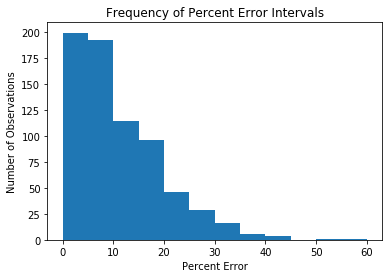

In [82]:
plt.hist(wrc_percent_error['Percent Error'],bins=pe_bin_cutoffs)
plt.title('Frequency of Percent Error Intervals')
plt.xlabel('Percent Error')
plt.ylabel('Number of Observations')

In [64]:
wrc_percent_error[560:580]

,Last Name,First Name,Year,Predicted Value,Actual Value,Residual,Percent Error
560,Taylor,Chris,2018.0,115.847907,113.0,-2.847907,-2.458315
561,Trout,Mike,2018.0,149.684018,190.0,40.315982,26.934059
562,Turner,Trea,2018.0,112.616590,105.0,-7.616590,-6.763293
563,Upton,Justin,2018.0,134.722114,123.0,-11.722114,-8.700958
564,Villar,Jonathan,2018.0,98.886706,93.0,-5.886706,-5.952980
565,Votto,Joey,2018.0,143.206545,130.0,-13.206545,-9.222026
566,Wendle,Joey,2018.0,90.100738,117.0,26.899262,29.854652
567,Yelich,Christian,2018.0,138.564625,166.0,27.435375,19.799696
568,Zobrist,Ben,2018.0,100.584118,123.0,22.415882,22.285707
571,Abreu,Jose,2019.0,135.060522,117.0,-18.060522,-13.372170


In [88]:
num_overestimates = 0
num_underestimates = 0
pe_g1 = 0
pe_g2 = 0
pe_g3 = 0
pe_g4 = 0
pe_g5 = 0
for row in range(0,len(wrc_percent_error)):
    if (wrc_percent_error['Residual'][row] < 0):
        num_overestimates = num_overestimates + 1
    if (wrc_percent_error['Residual'][row] > 0):
        num_underestimates = num_underestimates + 1
    if (abs(wrc_percent_error['Percent Error'][row]) < 5):
        pe_g1 = pe_g1 + 1
    if (5 < abs(wrc_percent_error['Percent Error'][row]) < 10):
        pe_g2 = pe_g2 + 1
    if (10 < abs(wrc_percent_error['Percent Error'][row]) < 15):
        pe_g3 = pe_g3 + 1
    if (15 < abs(wrc_percent_error['Percent Error'][row]) < 20):
        pe_g4 = pe_g4 + 1
    if (abs(wrc_percent_error['Percent Error'][row]) > 20):
        pe_g5 = pe_g5 + 1

percent_overestimated = round((num_overestimates/len(wrc_percent_error))*100,2)
print("Percent of observations which were overestimated: " + str(percent_overestimated))
percent_underestimated = round((num_underestimates/len(wrc_percent_error))*100,2)
print("Percent of observations which were underestimated: " + str(percent_underestimated))
pe_g1_p = round((pe_g1/len(wrc_percent_error))*100,2)
print("Percent of observations with absolute value of percent error less than five percent: " + str(pe_g1_p))
pe_g2_p = round((pe_g2/len(wrc_percent_error))*100,2)
print("Percent of observations with absolute value of percent error between five and ten percent: " + str(pe_g2_p))
pe_g3_p = round((pe_g3/len(wrc_percent_error))*100,2)
print("Percent of observations with absolute value of percent error between ten and fifteen percent: " + str(pe_g3_p))
pe_g4_p = round((pe_g4/len(wrc_percent_error))*100,2)
print("Percent of observations with absolute value of percent error between fifteen and twenty percent: " + str(pe_g4_p))
pe_g5_p = round((pe_g5/len(wrc_percent_error))*100,2)
print("Percent of observations with absolute value of percent error greater than twenty percent: " + str(pe_g5_p))


Percent of observations which were overestimated: 51.42
Percent of observations which were underestimated: 48.58
Percent of observations with absolute value of percent error less than five percent: 28.27
Percent of observations with absolute value of percent error between five and ten percent: 27.27
Percent of observations with absolute value of percent error between ten and fifteen percent: 16.19
Percent of observations with absolute value of percent error between fifteen and twenty percent: 13.64
Percent of observations with absolute value of percent error greater than twenty percent: 14.63


In [89]:
print("Maximum residual for wRC+ model: " + str(round(wrc_percent_error['Residual'].max(),2)))

51.583263348087385

In [96]:
print("Minimum residual for wRC+ model: " + str(round(wrc_percent_error['Residual'].min(),2)))

Minimum residual for wRC+ model: -53.44


In [91]:
r_bin_cutoffs = [-55,-50,-45,-40,-35,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55]

Text(0,0.5,'Number of Observations')

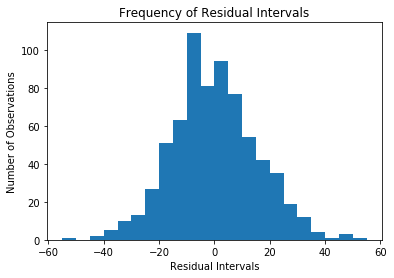

In [92]:
plt.hist(wrc_percent_error['Residual'],bins=r_bin_cutoffs)
plt.title('Frequency of Residual Intervals')
plt.xlabel('Residual Intervals')
plt.ylabel('Number of Observations')

In [93]:
residual_g1 = 0
residual_g2 = 0
residual_g3 = 0
residual_g4 = 0
residual_g5 = 0
residual_g6 = 0
residual_g7 = 0
for row in range(0,len(wrc_percent_error)):
    if (abs(wrc_percent_error['Residual'][row]) < 5):
        residual_g1 = residual_g1 + 1
    if (5 < abs(wrc_percent_error['Residual'][row]) < 10):
        residual_g2 = residual_g2 + 1
    if (10 < abs(wrc_percent_error['Residual'][row]) < 15):
        residual_g3 = residual_g3 + 1
    if (15 < abs(wrc_percent_error['Residual'][row]) < 20):
        residual_g4 = residual_g4 + 1
    if (20 < abs(wrc_percent_error['Residual'][row]) < 25):
        residual_g5 = residual_g5 + 1
    if (25 < abs(wrc_percent_error['Residual'][row]) < 30):
        residual_g6 = residual_g6 + 1
    if (30 < abs(wrc_percent_error['Residual'][row])):
        residual_g7 = residual_g7 + 1

residual_g1_p = round((residual_g1/len(wrc_percent_error))*100,2)
print("Percent of observations with residual less than five: " + str(residual_g1_p))
residual_g2_p = round((residual_g2/len(wrc_percent_error))*100,2)
print("Percent of observations with residual between five and ten: " + str(residual_g2_p))
residual_g3_p = round((residual_g3/len(wrc_percent_error))*100,2)
print("Percent of observations with residual between ten and fifteen: " + str(residual_g3_p))
residual_g4_p = round((residual_g4/len(wrc_percent_error))*100,2)
print("Percent of observations with residual between fifteen and twenty: " + str(residual_g4_p))
residual_g5_p = round((residual_g5/len(wrc_percent_error))*100,2)
print("Percent of observations with residual between twenty and twenty-five: " + str(residual_g5_p))
residual_g6_p = round((residual_g6/len(wrc_percent_error))*100,2)
print("Percent of observations with residual between twenty-five and thirty: " + str(residual_g6_p))
residual_g7_p = round((residual_g7/len(wrc_percent_error))*100,2)
print("Percent of observations with residual greater than thirty: " + str(residual_g7_p))


Percent of observations with residual less than five: 24.86
Percent of observations with residual between five and ten: 26.42
Percent of observations with residual between ten and fifteen: 16.62
Percent of observations with residual between fifteen and twenty: 13.21
Percent of observations with residual between twenty and twenty-five: 8.81
Percent of observations with residual between twenty-five and thirty: 4.55
Percent of observations with residual greater than thirty: 5.54


The OPS+ model seems to be moderately accurate. Over half of the observations have a residual less than ten, which is a pretty accurate result, yet there are also a fair number of observations with large residuals. We conclude that the model is decent, but has some flaws which cause fairly large residuals sometimes.